In [55]:
import pytesseract
import cv2

In [56]:
#https://stackoverflow.com/questions/28816046/
#displaying-different-images-with-actual-size-in-matplotlib-subplot
from matplotlib import pyplot as plt
def display(im_path):
    dpi = 80
    im_data = plt.imread(im_path)

    height, width  = im_data.shape[:2]
    
    # What size does the figure need to be in inches to fit the image?
    figsize = width / float(dpi), height / float(dpi)

    # Create a figure of the right size with one axes that takes up the full figure
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([0, 0, 1, 1])

    # Hide spines, ticks, etc.
    ax.axis('off')

    # Display the image.
    ax.imshow(im_data, cmap='gray')

    plt.show()

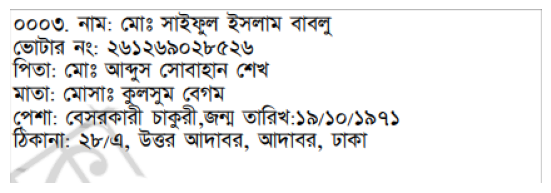

In [57]:
image = cv2.imread("temp/index_roi.png")
base_image = image.copy()
display("temp/index_roi.png")

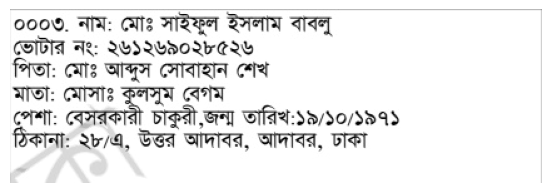

In [58]:
def grayscale(image):
    return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
gray_image = grayscale(image)
cv2.imwrite("temp/gray2.jpg", gray_image)
display("temp/gray2.jpg")


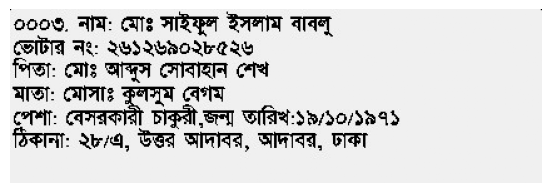

In [59]:
thresh, im_bw = cv2.threshold(gray_image, 180, 120, cv2.THRESH_BINARY)
cv2.imwrite("temp/bw_image2.jpg", im_bw)
display("temp/bw_image2.jpg")

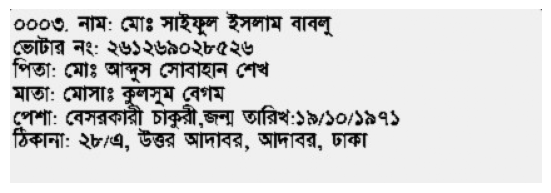

In [60]:
blur = cv2.GaussianBlur(im_bw, (5,5), 0.5)
cv2.imwrite("temp/index_blur.jpg", blur)
display("temp/index_blur.jpg")

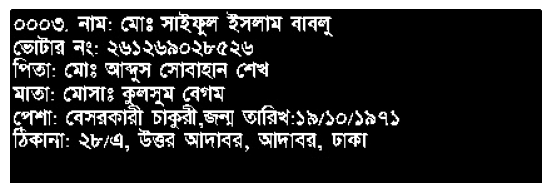

In [61]:
thresh = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
cv2.imwrite("temp/index_thresh.jpg", thresh)
display("temp/index_thresh.jpg")

In [62]:
# cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cnts = cnts[0] if len(cnts) == 2 else cnts[2]
# cnts = sorted(cnts, key=lambda x: cv2.boundingRect(x)[0])
# for c in cnts:
#     x, y, w, h = cv2.boundingRect(c)
#     cv2.rectangle(image, (x, y), (x+w, y+h), (36, 255, 12), 2)
    
# cv2.imwrite("temp/index_bbox.jpg", image)

# display("temp/index_bbox.jpg")

In [63]:
ocr = pytesseract.image_to_string(im_bw, lang='Bengali')
print(ocr)

০০০৩. নাম: মোঃ সাইফুল ইসলাম বাবলু
নয নং: ২৬১২৬৯০২৮৫২৬

চাকুরী.জন্ম তারিখ:১৯/১০/১৯৭১
লনা ২৮/এ, উত্তর আদাবর, আদাবর, ঢাকা

